### <img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

   # Machine Learning project on Candy dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
4. [Analysis](#section4)<br>
    - 4.1 [Finding Corelation](#section401)<br>
    - 4.2 [Bivariate Analysis](#section402)<br>
5. [Model Training](#section5)<br>
    - 5.1 [Model Train, Prediction & Evaluation using Linear Regression](#section501)<br>
    - 5.2 [Model Train, Prediction & Evaluation using Decision Tree](#section502)<br>
    - 5.3 [Model Train, Prediction & Evaluation using Random Forest](#section503)<br>
6. [Conclusion](#section6)<br>
    - 6.1 [Identifying the Components that make a Good Candy](#section601)<br>
    - 6.2 [Most Popular and Least Popular Candies](#section602)<br>

<a id=section1></a>

# 1. Problem Statement

### Since this is the Candy Data set which is collected during Online Survey to identify below points<br>
1.1 Which qualities are associated with higher rankings?<br>
1.2 What’s the most popular candy? Least popular?

<a id=section2></a>

# 2. Data Loading and Description
<img src="https://raw.githubusercontent.com/Ajay244/ML_Project/master/HalloweenEventsv2.jpg" />

### Context

What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. In total, more than 269 thousand votes were collected from 8,371 different IP addresses.

__Acknowledgements:__

This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license. Check out the analysis and write-up here: The Ultimate Halloween Candy Power Ranking. Thanks to Walt Hickey for making the data available.

### Content

Candy-data.csv includes attributes for each candy along with its ranking.

For binary variables, 1 means yes, 0 means no. The data contains the following fields:

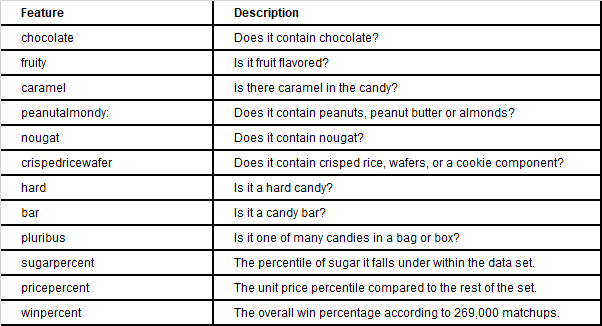

### Importing Packages

In [62]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                   # Plotting library for Python programming language and it's numerical mathematics extension NumPy                     
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import sys                                                                      # Import packages
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
from scipy.stats import spearmanr

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)                                                                     # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)                                                                                      # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

from subprocess import check_output

### Importing Dataset

In [12]:
Candy_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>

# 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding Data Set

In [13]:
Candy_data.shape

(85, 13)

In [14]:
Candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [15]:
Candy_data.tail()  

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [16]:
Candy_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [17]:
Candy_data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Above Statement shows that there is no column having blank/NAN data.

In [22]:
Candy_data.describe(include='all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Runts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [24]:
profile = pandas_profiling.ProfileReport(Candy_data)
profile.to_file(outputfile="Matches_before_preprocessing.html")

1. Total missing value is 0<br>
2. There are 43% chocolates which has one of the combination as Chocolate.<br>
3. There are 44% Chocolates which has one of the combination as Fruity.<br>
4. 48% of the chocolates are either in a box or bag.<br>
5. 24% of the chocolates are in Bar form.<br>

<a id=section302></a>

### 3.3 Preprocessing

Since there are no missing values and no Columns which need to be drop hence no Preprocessing is required. 

<a id=section4></a>

# 4. Analysis

<a id=section401></a>

### 4.1 Finding Corelation

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5,1,'Correlation between features')

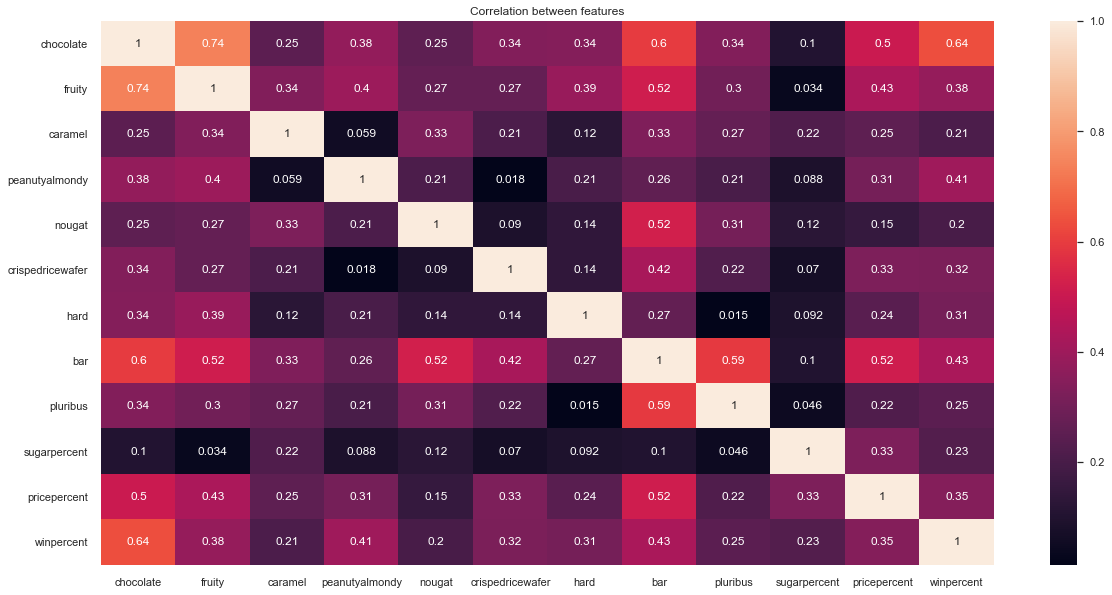

In [59]:
orr = Candy_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Candy_data.corr().abs(),annot = True)
plt.title('Correlation between features')

From the above observation we can see that there is high corelation between Chocolate & Fruity. 

In [34]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(Candy_data))

,Feature1,Feature2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
5,bar,pricepercent,0.518407
6,fruity,bar,0.515066
7,chocolate,pricepercent,0.504675
8,fruity,pricepercent,0.430969
9,bar,winpercent,0.429929


In [38]:
winners = Candy_data[Candy_data.winpercent>Candy_data.winpercent.quantile(.6)]
print(winners)

                 competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                     100 Grand          1       0        1               0   
1                  3 Musketeers          1       0        0               0   
6                     Baby Ruth          1       0        1               1   
18            Haribo Gold Bears          0       1        0               0   
22             HersheyÕs Kisses          1       0        0               0   
23            HersheyÕs Krackel          1       0        0               0   
24     HersheyÕs Milk Chocolate          1       0        0               0   
25       HersheyÕs Special Dark          1       0        0               0   
27                 Junior Mints          1       0        0               0   
28                      Kit Kat          1       0        0               0   
32          Peanut butter M&MÕs          1       0        0               1   
33                        M&MÕs          1       0  

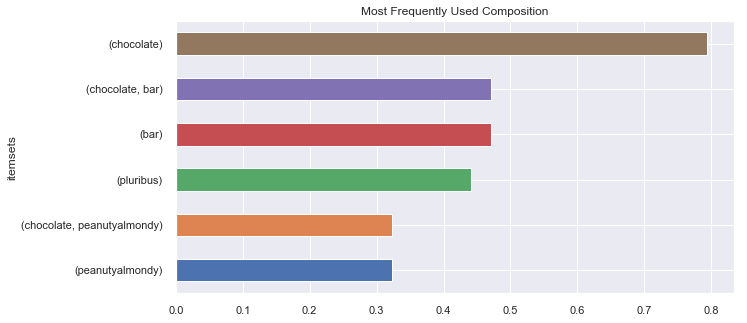

In [48]:
from mlxtend.frequent_patterns import apriori
df =  winners[Candy_data.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

<a id=section402></a>

<a id=section402></a>

### 4.2 Bivariate Analysis

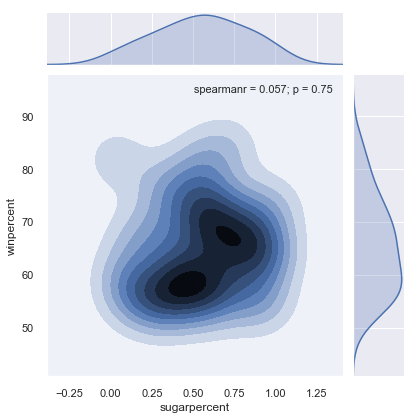

In [63]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde",stat_func=spearmanr)

##### Linearity of Sugar and Win Percent:- 

The above plot proves the alternative hypothesis that sugar percentage is not linear to the popularity of the candy i.e. __sugar content of candy doesn't contribute to the popularity of the candy__.

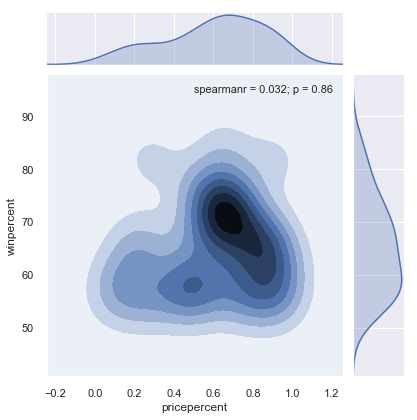

In [64]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde",stat_func=spearmanr)

#### Linearity of Price and Win Percent

The above plot proves the alternative hypothesis that price percentage is not linear to the popularity of the candy i.e. __cost of candy doesn't contribute to the popularity of the candy__

<a id=section5></a>

# 5. Model Training & Checking Accuracy Using Different Algorithm

In [79]:
winners.sugarpercent = round(winners.sugarpercent,3)
winners.pricepercent = round(winners.pricepercent,3)
winners.winpercent = round(winners.winpercent,3)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(winners[winners.columns[1:10]],winners[winners.columns[-1]], test_size=0.20, random_state=42)


In [129]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27, 9)
(27,)
(7, 9)
(7,)


__Training Data Using LinerRegression__

In [130]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(X_train,y_train)
print(lr_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [131]:
y_pred_train = lr_reg.predict(X_train)
y_pred_test = lr_reg.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[61.97365983 59.72075    70.72504455 67.68339816 65.01530622 61.5956082
 55.354      70.72504455 65.33158416 65.01530622 68.37323055 68.02830057
 59.72075    59.72075    70.38011457 67.71202263 59.72075    84.18
 61.5956082  61.97365983 58.8988918  67.71202263 67.68339816 58.8988918
 67.71202263 65.33158416 68.02830057]
[55.8572454  70.72504455 59.72075    59.72075    65.01530622 84.18
 84.18      ]


Model Evaluation using Accuracy

In [132]:
lr_reg.score(X_test, y_test)

0.37475605032100157

__Training Data Using DecisionTree__

In [133]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
print(reg)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [137]:
y_pred_train = reg.predict(X_train)
y_pred_test =  reg.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[60.6825     59.72075    69.5265     74.3075     60.6825     62.631
 55.354      69.5265     66.9505     60.6825     67.603      66.7945
 59.72075    59.72075    59.529      71.46133333 59.72075    84.18
 62.631      60.6825     57.8635     71.46133333 74.3075     57.8635
 71.46133333 66.9505     66.7945    ]
[57.8635  69.5265  59.72075 59.72075 60.6825  84.18    84.18   ]


Evaluation Using Accuracy

In [139]:
reg.score(X_test, y_test)

0.5478030070979345

__Training Data Using RandomForest__

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)
print(rf_reg)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [141]:
y_pred_train = rf_reg.predict(X_train)
y_pred_test =  rf_reg.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[60.97613242 59.5329023  70.00689942 73.07993113 61.427315   62.89518958
 57.24002123 70.00689942 66.64594717 61.427315   65.81243958 66.77309058
 59.5329023  59.5329023  64.15441983 71.39021067 59.5329023  77.3984095
 62.89518958 60.97613242 58.87122792 71.39021067 73.07993113 58.87122792
 71.39021067 66.64594717 66.77309058]
[62.01134892 70.00689942 59.5329023  59.5329023  61.427315   77.3984095
 77.3984095 ]


Evaluation Using Accuracy

In [142]:
rf_reg.score(X_test, y_test)

0.7862253347645063

<a id=section6></a>

#### From Above Training & Testing & evaluation it is observed that Model Accuracy works good with Random Decison Tree Algorithm

# 6. Conclusion

<a id=section601></a>

### 6.1 Identifying the Components that make a Good Candy

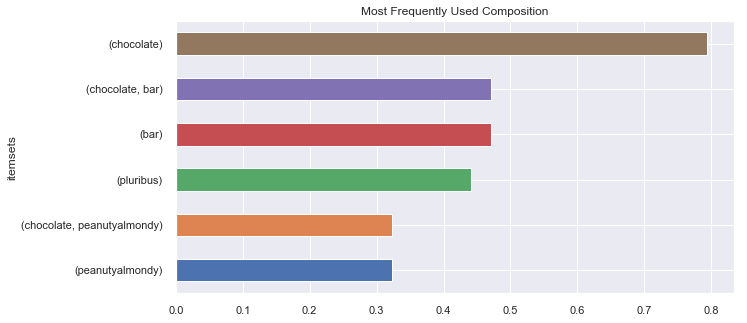

In [146]:
association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

<a id=section602></a>

<a id=section602></a>

### 6.2  Most Popular and Least Popular Candies

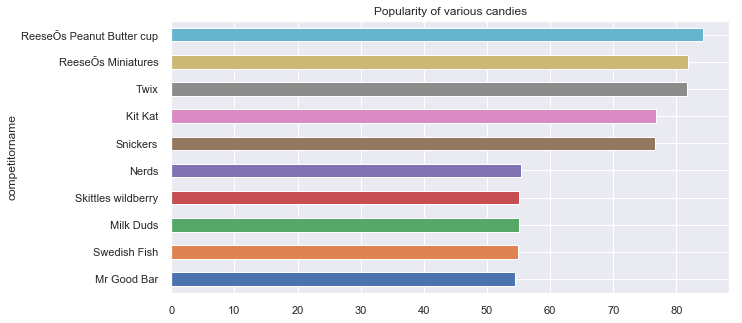

In [152]:
popularity = winners[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

### THANK YOU